# Explorative Datenanalyse eines Online-Shops

```

In [26]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [27]:
# CSV-Datei laden
datafile = os.path.join("..", "data", "data.csv")
df = pd.read_csv(datafile, encoding="latin1", parse_dates=["InvoiceDate"])

# Neue Spalte 'TotalPrice' berechnen
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [28]:
# Überblick über die Struktur und ersten Zeilen der Daten
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
# Statistische Übersicht der numerischen Spalten
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909,541909.000000,406829.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,378.810824


In [38]:
# Gesamtumsatz
total_revenue = df["TotalPrice"].sum()
print(f"Gesamtumsatz: {total_revenue:.1f} GBP")

# Durchschnittlicher Warenkorbwert
average_order_value = df.groupby("InvoiceNo")["TotalPrice"].sum().mean()
print(f"Durchschnittlicher Warenkorbwert: {average_order_value:.1f} GBP")

Gesamtumsatz: 9747747.9 GBP
Durchschnittlicher Warenkorbwert: 376.4 GBP


C:\Users\wsymb\AppData\Local\Temp\ipykernel_25088\3030325979.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index("InvoiceDate").resample("M")["TotalPrice"].sum()


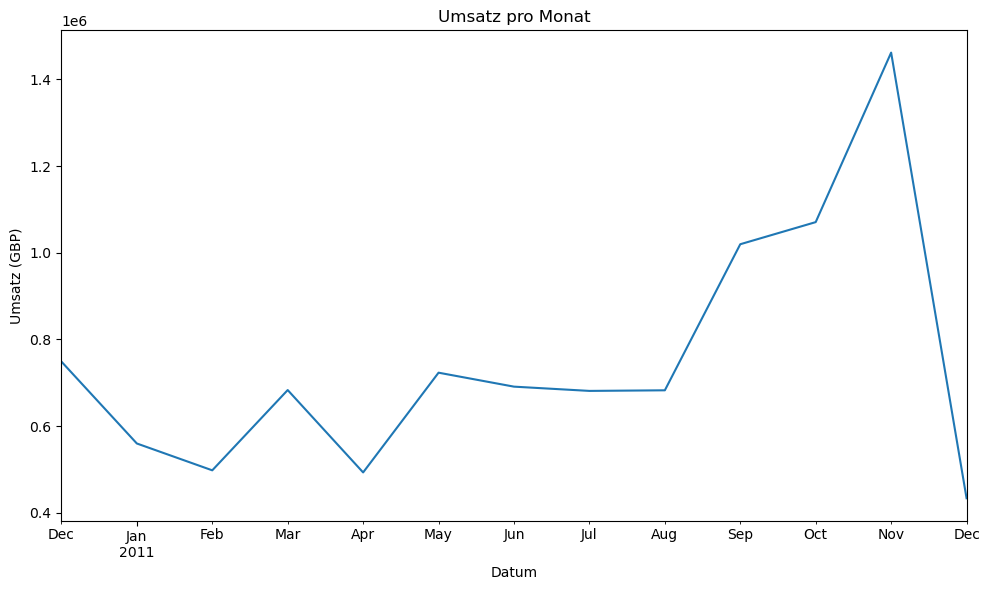

In [39]:
# Umsatz pro Monat visualisieren
monthly_revenue = df.set_index("InvoiceDate").resample("M")["TotalPrice"].sum()

plt.figure(figsize=(10,6))
monthly_revenue.plot()
plt.title("Umsatz pro Monat")
plt.xlabel("Datum")
plt.ylabel("Umsatz (GBP)")
plt.tight_layout()
plt.show()


##  Produktanalyse
Untersuchung der meistverkauften Produkte

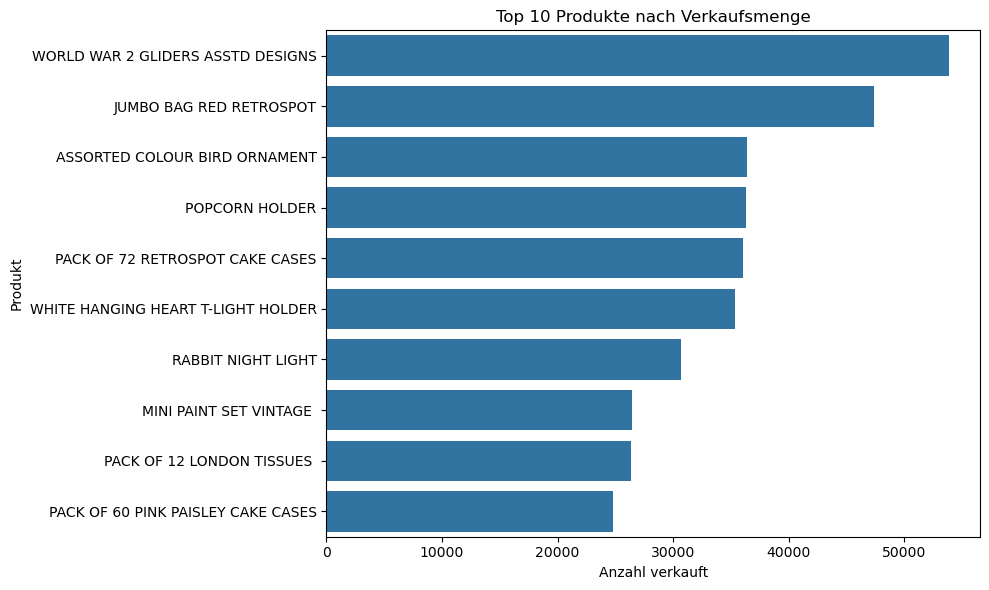

In [35]:


# Top 10 Produkte nach Verkaufsmenge
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Produkte nach Verkaufsmenge")
plt.xlabel("Anzahl verkauft")
plt.ylabel("Produkt")
plt.tight_layout()
plt.show()



## Umsatzanalyse
Analyse des Gesamtumsatzes und der monatlichen Entwicklung


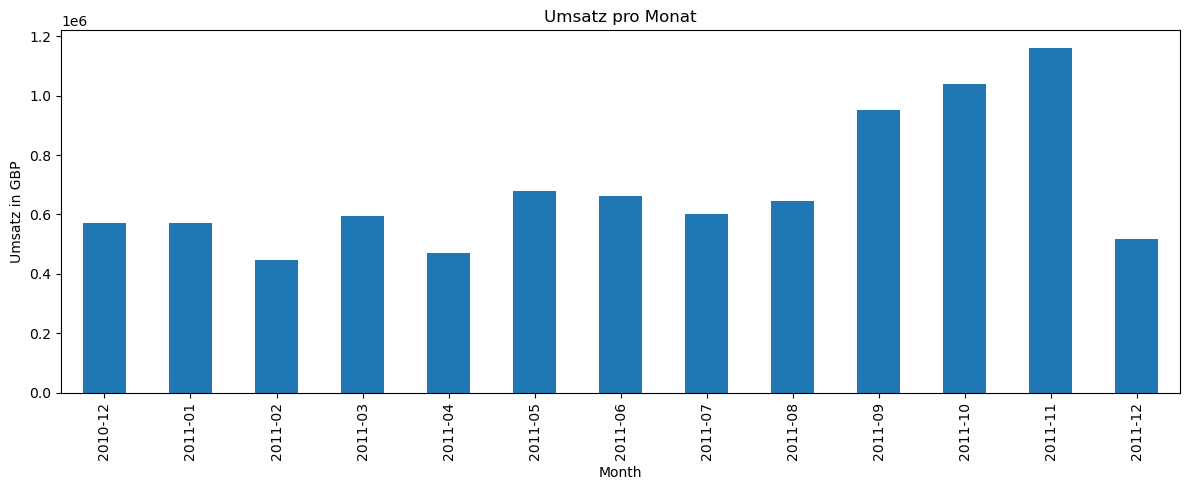

In [14]:
# Umsatz nach Monat
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalPrice"].sum()

monthly_sales.plot(kind="bar", figsize=(12,5), title="Umsatz pro Monat")
plt.ylabel("Umsatz in GBP")
plt.tight_layout()
plt.show()



## Kundenanalyse
Analyse der Top-Kunden und ihres Kaufverhaltens


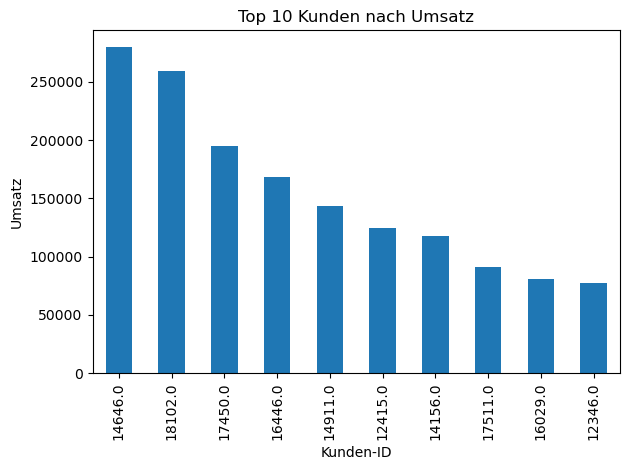

In [15]:
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind="bar", title="Top 10 Kunden nach Umsatz")
plt.xlabel("Kunden-ID")
plt.ylabel("Umsatz")
plt.tight_layout()
plt.show()


## Verbesserung: Datenbereinigung
Bevor mit der Analyse begonnen wird, sollten die Daten bereinigt werden (z.B. fehlende Werte, Dubletten, negative Mengen/Preise, Stornierungen).

In [40]:
# Fehlende Werte prüfen
print(df.isnull().sum())

# Dubletten entfernen
df = df.drop_duplicates()

# Negative Mengen und Preise entfernen (Stornierungen)
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Nach der Bereinigung Überblick verschaffen
df.info()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      524878 non-null  object        
 8   TotalPrice   524878 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 524878 

## Erweiterung: RFM-Analyse (Recency, Frequency, Monetary)
Segmentierung der Kunden nach Kaufverhalten.

In [41]:
import datetime

snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
})
rfm.rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "TotalPrice": "Monetary"}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
